In [1]:
import findmylibrary
import reduced_models

In [2]:
# %matplotlib notebook
# import matplotlib
# matplotlib.use('nbagg')

In [3]:
from matplotlib import pyplot as plt
import numpy as np

In [4]:
landas1 = [1.0, 1.1111111111111112, 1.2222222222222223, 1.3333333333333333, 1.4444444444444444, 1.5555555555555556, 1.6666666666666665, 1.7777777777777777, 1.8888888888888888, 2.0]
pro_P1 = [0.05329097974263132, 0.07489766161823645, 0.10395492345094681, 0.1404627652407624, 0.18442118698768317, 0.23508513069599868, 0.2902194223785773, 0.3393932500954718, 0.3900571938037872, 0.4347606735464185]

In [5]:
landas2 = [1.0, 1.1111111111111112, 1.2222222222222223, 1.3333333333333333, 1.4444444444444444, 1.5555555555555556, 1.6666666666666665, 1.7777777777777777, 1.8888888888888888, 2.0]
pro_P2 = [0.025351304903486742, 0.036527174839144576, 0.05049701225871686, 0.06856466865469701, 0.08979882153244688, 0.11513079338660465, 0.14120782323647293, 0.16877496907776224, 0.19783223091047258, 0.22465431875605138]

In [6]:
landas3 = [1.0, 1.1111111111111112, 1.2222222222222223, 1.3333333333333333, 1.4444444444444444, 1.5555555555555556, 1.6666666666666665, 1.7777777777777777, 1.8888888888888888, 2.0]
pro_P3 = [0.013570075346314117, 0.020368729557172626, 0.02972852062828606, 0.04118378731233534, 0.05301158299423987, 0.063535527183651, 0.07284875213003252, 0.08160318357963114, 0.08979882153244688, 0.09799445948526264]

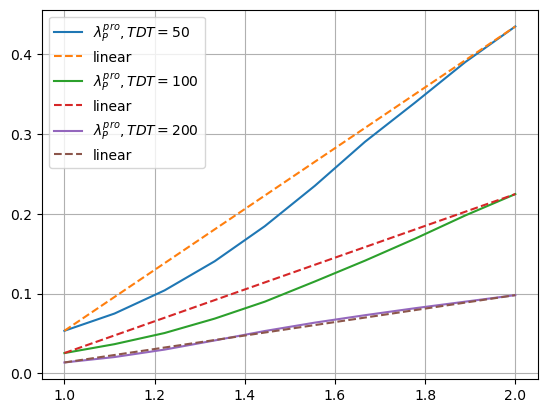

In [7]:
for landas, pro_P, TDT in zip([landas1, landas2, landas3], [pro_P1, pro_P2, pro_P3], [50, 100, 200]):
    l = np.array([landas[0], landas[-1]])
    p = np.array([pro_P[0], pro_P[-1]])
    plt.plot(landas, pro_P,label='$\lambda^{pro}_P' + f', TDT={TDT}$')
    plt.plot(l, p, '--', label='linear')
#plt.loglog(l, p**2/p[0], label='quad')
plt.grid(True)
plt.legend()
plt.show()

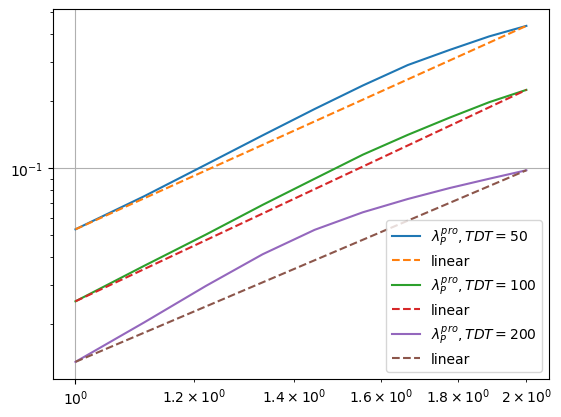

In [8]:
for landas, pro_P, TDT in zip([landas1, landas2, landas3], [pro_P1, pro_P2, pro_P3], [50, 100, 200]):
    l = np.array([landas[0], landas[-1]])
    p = np.array([pro_P[0], pro_P[-1]])
    plt.loglog(landas, pro_P,label='$\lambda^{pro}_P' + f', TDT={TDT}$')
    plt.loglog(l, p, '--', label='linear')
#plt.loglog(l, p**2/p[0], label='quad')
plt.grid(True)
plt.legend()
plt.show()

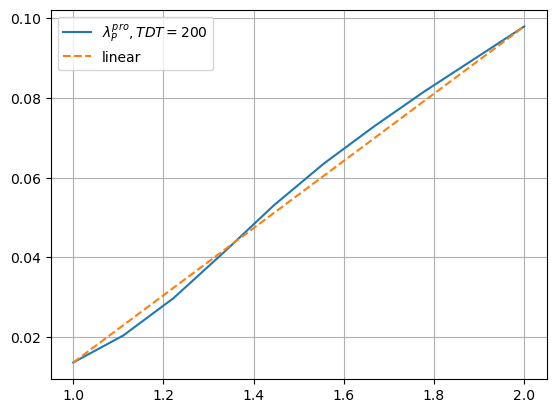

In [9]:
for landas, pro_P, TDT in zip([landas3], [pro_P3], [200]):
    l = np.array([landas[0], landas[-1]])
    p = np.array([pro_P[0], pro_P[-1]])
    plt.plot(landas, pro_P, label='$\lambda^{pro}_P' + f', TDT={TDT}$')
    plt.plot(l, p, '--', label='linear')
#plt.loglog(l, p**2/p[0], label='quad')
plt.grid(True)
plt.legend()
plt.show()

In [10]:
tdt_direct = [200.0, 177.5, 183.5, 197.5, 208.0, 210.5, 209.0, 206.0, 203.0, 200.0]
tdt_regression = [217.5, 183.5, 185.5, 197.5, 206.0, 207.5, 205.5, 202.0, 198.5, 195.5]
tdt_log_regression = [169.5, 188.0, 209.5, 228.0, 233.5, 226.0, 212.5, 197.5, 183.5, 170.0]

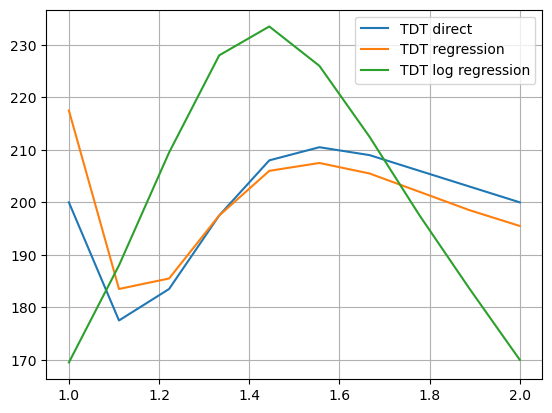

In [11]:
plt.plot(landas, tdt_direct, label='TDT direct')
plt.plot(landas, tdt_regression, label='TDT regression')
plt.plot(landas, tdt_log_regression, label='TDT log regression')
plt.grid(True)
plt.legend()
plt.show()